# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [2]:
c_data = pd.read_csv("data/CleanAviationData.csv")

c_data

/var/folders/gq/b1tckqn91cvbfg9bjycs6t4c0000gp/T/ipykernel_99564/1992313006.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  c_data = pd.read_csv("data/CleanAviationData.csv")


,Unnamed: 0,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Total.Passengers,Injury.Likelihood,Aircraft.Destroyed
0,3601,Accident,1983-01-01,"NEWPORT, OR",United States,NaN,NaN,Non-Fatal,Substantial,Airplane,...,0.0,0.0,1.0,3.0,VMC,Approach,Probable Cause,4.0,0.0,False
1,3602,Accident,1983-01-01,"WOODBINE, IA",United States,NaN,NaN,Non-Fatal,Substantial,Airplane,...,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,2.0,0.0,False
2,3603,Accident,1983-01-01,"MARYVILLE, MO",United States,NaN,NaN,Non-Fatal,Substantial,Airplane,...,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,1.0,0.0,False
3,3604,Accident,1983-01-01,"UPLAND, CA",United States,NaN,NaN,Non-Fatal,Substantial,Airplane,...,0.0,0.0,2.0,0.0,VMC,Approach,Probable Cause,2.0,0.0,False
4,3605,Accident,1983-01-01,"SPRINGBROOK, WI",United States,NaN,NaN,Non-Fatal,Substantial,Airplane,...,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,2.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65439,88883,Accident,2022-12-22,"Brasnorte,",Brazil,NaN,NaN,Fatal,Unknown,Airplane,...,1.0,0.0,0.0,0.0,UNK,Unknown,NaN,1.0,1.0,False
65440,88884,Accident,2022-12-26,"Annapolis, MD",United States,NaN,NaN,Minor,Unknown,Airplane,...,0.0,1.0,0.0,0.0,UNK,Unknown,NaN,1.0,1.0,False
65441,88885,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,Unknown,Airplane,...,0.0,0.0,0.0,0.0,UNK,Unknown,NaN,0.0,NaN,False
65442,88887,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,Unknown,Airplane,...,0.0,0.0,0.0,0.0,UNK,Unknown,NaN,0.0,NaN,False


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [3]:
# Create a new column of Plane.Type, where Total.Passengers = 0 is Unknown (since this might be a placeholder), Total.Passengers >= 20 is a Plane.Type of Large, and Total.Passengers < 20 is a Plane.Type of Small
# For rows where Total.Passengers is NaN, return 'Unknown" for the Plane.Type
c_data['Plane.Type'] = np.select(
    [c_data['Total.Passengers'] == 0, c_data['Total.Passengers'] >= 20, c_data['Total.Passengers'] < 20],
    ['Unknown', 'Large', 'Small'],
    default = 'Unknown')

c_data['Plane.Type'].value_counts()

Plane.Type
Small      51799
Unknown    11683
Large       1962
Name: count, dtype: int64

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [4]:
# Set up the data to group by Make, take the mean of Injury Likelihood, sort ascending, and take just the first 15
injury_risk_large_bottom15 = c_data[c_data['Plane.Type'] == 'Large'].groupby('Make')['Injury.Likelihood'].mean().sort_values(ascending = True).head(15)
injury_risk_small_bottom15 = c_data[c_data['Plane.Type'] == 'Small'].groupby('Make')['Injury.Likelihood'].mean().sort_values(ascending = True).head(15)

print(injury_risk_large_bottom15)
print(injury_risk_small_bottom15)

Make
Aero Commander       0.000000
Mooney               0.000000
Hughes               0.000000
Gulfstream           0.000000
Grumman              0.000000
Swearingen           0.000000
Cessna               0.002051
Bombardier           0.035223
Mcdonnell Douglas    0.035469
Aerospatiale         0.039126
Boeing               0.045043
Airbus               0.063233
Embraer              0.077097
Douglas              0.089528
Fairchild            0.112719
Name: Injury.Likelihood, dtype: float64
Make
Bombardier    0.092028
Waco          0.119241
Enstrom       0.160112
Boeing        0.162716
Maule         0.164348
Hiller        0.169776
Swearingen    0.174994
Grumman       0.208727
Stinson       0.210539
Aviat         0.221154
Diamond       0.223333
Hughes        0.224865
Schweizer     0.232054
Luscombe      0.241255
Cessna        0.242887
Name: Injury.Likelihood, dtype: float64


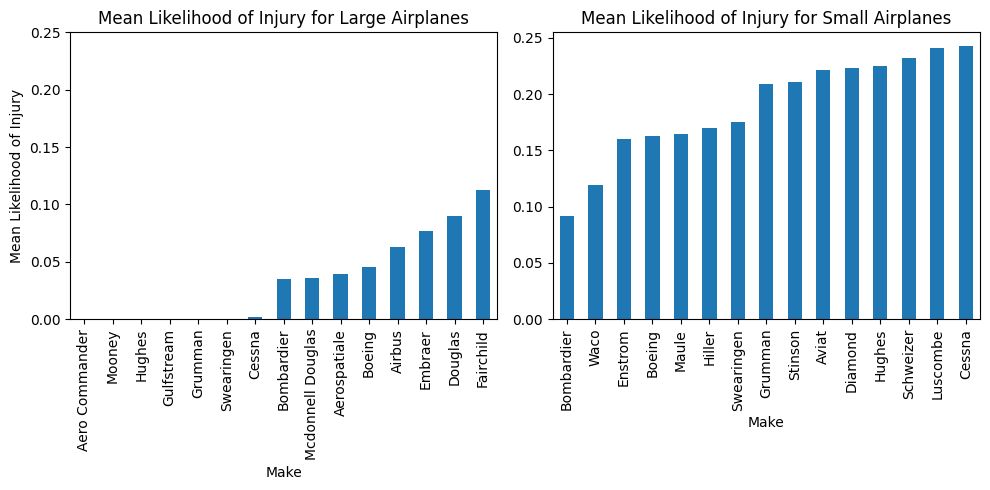

In [5]:
# Plot the two DataFrames next to each other in bar charts, matching the Y-axis scale for each
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

injury_risk_large_bottom15.plot.bar(
    ax = axes[0],
    x = 'Make',
    title = 'Mean Likelihood of Injury for Large Airplanes',
    legend = False)

injury_risk_small_bottom15.plot.bar(
    ax = axes[1],
    x = 'Make',
    title = 'Mean Likelihood of Injury for Small Airplanes',
    legend = False)

axes[0].set_ylabel('Mean Likelihood of Injury')
axes[0].tick_params(axis = 'x', rotation = 90)
axes[0].set_ylim(0, 0.25)
plt.tight_layout()
plt.show()

In [6]:
c_data.describe()

,Unnamed: 0,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Passengers,Injury.Likelihood
count,65444.000000,61361.000000,56856.000000,56004.000000,56486.000000,61380.000000,54642.000000,53761.000000
mean,43561.213648,1.174655,0.674353,0.271731,0.363028,6.405539,6.872552,0.264334
std,24288.441556,0.436130,6.002160,1.709459,1.942302,31.264656,30.110608,0.424568
min,3601.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22560.750000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,42153.500000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
75%,63559.500000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.500000
max,88888.000000,4.000000,349.000000,161.000000,200.000000,699.000000,576.000000,1.000000


In [7]:
# Initial Thoughts:
#   - In general, large airplanes have a lower injury likelihood than small airplanes.
#   - There are some Makes that overlap between the two charts, but it is not an exact match.
#   - The overall mean of Injury Likelihood is 26%. All of the lowest 15 Makes, for both large and small aircraft, fall below this mean.

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [9]:
# Find the list of Makes for small airplanes with the ten lowest mean rates of Injury Likelihood
injury_risk_small_bottom10_makes = c_data[c_data['Plane.Type'] == 'Small'].groupby('Make')['Injury.Likelihood'].mean().sort_values(ascending = True).head(10).index.tolist()

# Filter the data to the relevant columns, filter by Airplane.Type, group by Make, and filter by the Makes found in the step above
injury_risk_small_bottom10 = c_data[['Plane.Type', 'Make', 'Injury.Likelihood']][c_data['Plane.Type'] == 'Small'][c_data['Make'].isin(injury_risk_small_bottom10_makes)]

print(injury_risk_small_bottom10)

      Plane.Type        Make  Injury.Likelihood
41         Small      Hiller                0.0
52         Small     Grumman                0.0
60         Small     Enstrom                0.0
84         Small     Grumman                0.0
87         Small       Maule                0.0
...          ...         ...                ...
65368      Small      Boeing                1.0
65407      Small     Stinson                1.0
65408      Small       Aviat                0.0
65433      Small  Swearingen                0.0
65438      Small     Grumman                0.5

[3615 rows x 3 columns]


/var/folders/gq/b1tckqn91cvbfg9bjycs6t4c0000gp/T/ipykernel_99564/4091823696.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  injury_risk_small_bottom10 = c_data[['Plane.Type', 'Make', 'Injury.Likelihood']][c_data['Plane.Type'] == 'Small'][c_data['Make'].isin(injury_risk_small_bottom10_makes)]


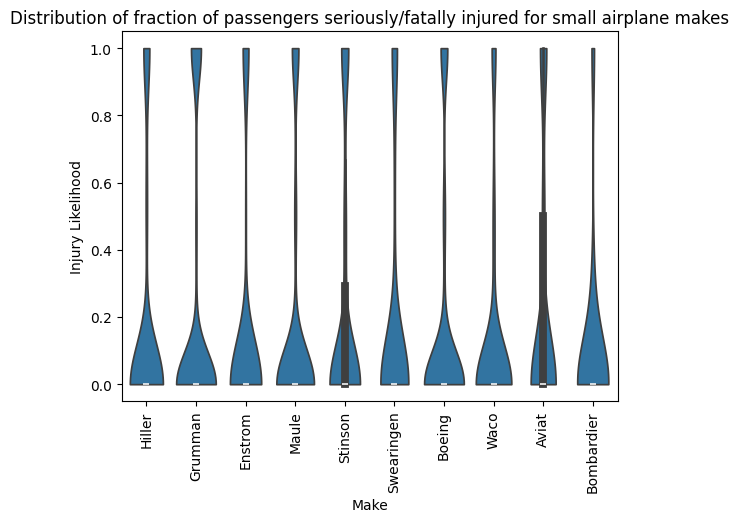

In [10]:
# Plot the violin plot, cutting off the y-axis at 0 to make it clearer that there are no negative values
fig = sns.violinplot(
    data = injury_risk_small_bottom10,
    x = 'Make',
    y = 'Injury.Likelihood',
    cut = 0)

plt.title('Distribution of fraction of passengers seriously/fatally injured for small airplane makes')
plt.xticks(rotation = 90)
plt.ylabel('Injury Likelihood')
plt.show()

In [12]:
# Initial Thoughts:
#   - This shows that the injury rates are concentrated around 0, which makes sense because these are the 10 Makes with the lowest inury rates.
#   - Each Make also has a smaller concentration around 1, which would indicate instances with a 100% injury rate. This makes sense, since an accident on a small airplane would be likely to injure all passengers.

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [ ]:
# Find the list of Makes for large airplanes with the ten lowest mean rates of Injury Likelihood
injury_risk_large_bottom10_makes = c_data[c_data['Plane.Type'] == 'Large'].groupby('Make')['Injury.Likelihood'].mean().sort_values(ascending = True).head(10).index.tolist()

# Filter the data to the relevant columns, filter by Airplane.Type, group by Make, and filter by the Makes found in the step above
injury_risk_large_bottom10 = c_data[['Plane.Type', 'Make', 'Injury.Likelihood']][c_data['Plane.Type'] == 'Large'][c_data['Make'].isin(injury_risk_large_bottom10_makes)]

print(injury_risk_large_bottom10)

      Plane.Type               Make  Injury.Likelihood
14         Large         Swearingen           0.000000
72         Large  Mcdonnell Douglas           0.000000
207        Large  Mcdonnell Douglas           0.000000
429        Large  Mcdonnell Douglas           0.000000
1020       Large  Mcdonnell Douglas           0.000000
...          ...                ...                ...
64148      Large         Bombardier           0.000000
64251      Large  Mcdonnell Douglas           0.047619
64871      Large  Mcdonnell Douglas           0.028571
65011      Large         Bombardier           0.013699
65272      Large         Bombardier           0.000000

[385 rows x 3 columns]


/var/folders/gq/b1tckqn91cvbfg9bjycs6t4c0000gp/T/ipykernel_99564/3557186548.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  injury_risk_large_bottom10 = c_data[['Plane.Type', 'Make', 'Injury.Likelihood']][c_data['Plane.Type'] == 'Large'][c_data['Make'].isin(injury_risk_large_bottom10_makes)]


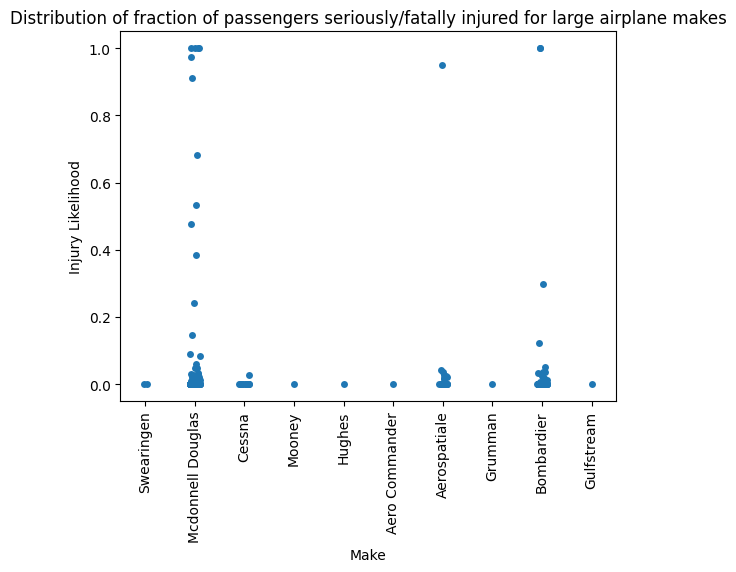

In [14]:
# Plot the strip plot
fig = sns.stripplot(
    data = injury_risk_large_bottom10,
    x = 'Make',
    y = 'Injury.Likelihood')

plt.title('Distribution of fraction of passengers seriously/fatally injured for large airplane makes')
plt.xticks(rotation = 90)
plt.ylabel('Injury Likelihood')
plt.show()

In [15]:
# Initial Thoughts:
#   - The data points are concentrated around 0, which makes sense because these are the Models with the lowest mean injury rate.
#   - All of the data points are between 0 and 1.0, which makes sense because we're looking at a range of 0-100%.
#   - We can see that McDonnell Douglas has the most variety of injury rates (of these Makes), while the others are more concentrated around a rate of 0, which potentially a handful of outliers.

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [16]:
# Count the data once grouped by Make and Aircraft.Destroyed, and filtered by Plane.Type
destruction_small = c_data[c_data['Plane.Type'] == 'Small'].groupby(['Make', 'Aircraft.Destroyed']).count()
destruction_small = destruction_small.rename(columns = {'Plane.Type': 'Counts'})['Counts']
destruction_large = c_data[c_data['Plane.Type'] == 'Large'].groupby(['Make', 'Aircraft.Destroyed']).count()
destruction_large = destruction_large.rename(columns = {'Plane.Type': 'Counts'})['Counts']

# Unstack the data
destruction_small_unstacked = destruction_small.unstack('Aircraft.Destroyed')
destruction_large_unstacked = destruction_large.unstack('Aircraft.Destroyed')

# Replace the NaNs with 0s
destruction_small_unstacked = destruction_small_unstacked.fillna(0)
destruction_large_unstacked = destruction_large_unstacked.fillna(0)

# Calculate the rate of destruction
destruction_small_unstacked['Rate.of.Destruction'] = destruction_small_unstacked[True] / (destruction_small_unstacked[True] + destruction_small_unstacked[False])
destruction_large_unstacked['Rate.of.Destruction'] = destruction_large_unstacked[True] / (destruction_large_unstacked[True] + destruction_large_unstacked[False])

# Sort and return the lowest 15
destruction_rate_small_bottom15 = destruction_small_unstacked.sort_values(by = 'Rate.of.Destruction').head(15)
destruction_rate_large_bottom15 = destruction_large_unstacked.sort_values(by = 'Rate.of.Destruction').head(15)

print(destruction_rate_small_bottom15)
print(destruction_rate_large_bottom15)

Aircraft.Destroyed  False  True  Rate.of.Destruction
Make                                                
Diamond               146     9             0.058065
Aviat                 146    10             0.064103
Bombardier             27     2             0.068966
Waco                  113    10             0.081301
Maule                 415    45             0.097826
Boeing                524    66             0.111864
Luscombe              286    38             0.117284
Taylorcraft           277    42             0.131661
Stinson               309    50             0.139276
Aeronca               450    75             0.142857
Champion              373    71             0.159910
De Havilland          313    62             0.165333
Enstrom               148    30             0.168539
Swearingen            103    22             0.176000
Schweizer             383    86             0.183369
Aircraft.Destroyed   False  True  Rate.of.Destruction
Make                                         

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

In [17]:
# SMALL AIRPLANES

'''
For small airplanes, the Makes that fall in the list of 15 lowest mean rate of injury and the list of 15 lowest rate of destruction are:
    - Bombardier
    - Waco
    - Boeing
    - Maule
    - Swearingen
    - Stinson
    - Aviat
    - Diamond
    - Luscombe

Bombardier and Waco stand out as the Makes that fall in the lowest five rates across both metrics. Bombardier has a mean 9.2% injury likelihood, and a mean 6.8% rate of destruction. Waco has a mean 11.9% injury likelihood, and a mean 8.1% rate of destruction. These is far below the overall rate of injury of 26% across all aircraft analyzed.

Therefore, for small airplanes, Bombardier and Waco are the top recommendations based on Make.
'''

# LARGE AIRPLANES

'''
For large airplanes, the Makes that fall in the list of 15 lowest mean rate of injury and the list of 15 lowest rate of destruction nearly completely overlap, with some variations in order.

There are some Makes that stand out as having a 0% injury likelihood and a 0% rate of destruction. These Makes are:
    - Aero Commander
    - Mooney
    - Hughes
    - Gulfstream
    - Grumman
    - Swearingen

Therefore, for large airplanes, all six of these are recommended when grouping by Make.
'''

'\nFor large airplanes, the Makes that fall in the list of 15 lowest mean rate of injury and the list of 15 lowest rate of destruction nearly completely overlap, with some variations in order.\n\nThere are some Makes that stand out as having a 0% injury likelihood and a 0% rate of destruction. These Makes are:\n    - Aero Commander\n    - Mooney\n    - Hughes\n    - Gulfstream\n    - Grumman\n    - Swearingen\n\nTherefore, for large airplanes, all six of these are recommended when grouping by Make.\n'

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

In [18]:
# Add a column combining Make and Model for ease of analysis
c_data['Make.and.Model'] = c_data['Make'] + " " + c_data['Model']
c_data.head()

,Unnamed: 0,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Total.Passengers,Injury.Likelihood,Aircraft.Destroyed,Plane.Type,Make.and.Model
0,3601,Accident,1983-01-01,"NEWPORT, OR",United States,NaN,NaN,Non-Fatal,Substantial,Airplane,...,1.0,3.0,VMC,Approach,Probable Cause,4.0,0.0,False,Small,Cessna 182P
1,3602,Accident,1983-01-01,"WOODBINE, IA",United States,NaN,NaN,Non-Fatal,Substantial,Airplane,...,0.0,2.0,VMC,Landing,Probable Cause,2.0,0.0,False,Small,Cessna 182RG
2,3603,Accident,1983-01-01,"MARYVILLE, MO",United States,NaN,NaN,Non-Fatal,Substantial,Airplane,...,0.0,1.0,VMC,Takeoff,Probable Cause,1.0,0.0,False,Small,Cessna 182P
3,3604,Accident,1983-01-01,"UPLAND, CA",United States,NaN,NaN,Non-Fatal,Substantial,Airplane,...,2.0,0.0,VMC,Approach,Probable Cause,2.0,0.0,False,Small,Piper PA-28R-200
4,3605,Accident,1983-01-01,"SPRINGBROOK, WI",United States,NaN,NaN,Non-Fatal,Substantial,Airplane,...,0.0,2.0,VMC,Landing,Probable Cause,2.0,0.0,False,Small,Cessna 140


In [19]:
# Filter to Make & Models with at least 10 examples, for both large and small
make_and_model_counts_large = c_data[c_data['Plane.Type'] == 'Large']['Make.and.Model'].value_counts()
make_and_model_top_categories_large = make_and_model_counts_large[make_and_model_counts_large >= 10].index.tolist()
c_data_large_filtered = c_data[c_data['Plane.Type'] == 'Large'][c_data['Make.and.Model'].isin(make_and_model_top_categories_large)]
print(c_data_large_filtered['Make.and.Model'].value_counts())

make_and_model_counts_small = c_data[c_data['Plane.Type'] == 'Small']['Make.and.Model'].value_counts()
make_and_model_top_categories_small = make_and_model_counts_small[make_and_model_counts_small >= 10].index.tolist()
c_data_small_filtered = c_data[c_data['Plane.Type'] == 'Small'][c_data['Make.and.Model'].isin(make_and_model_top_categories_small)]
print(c_data_small_filtered['Make.and.Model'].value_counts())


Make.and.Model
Boeing 737                    200
Boeing 777                     35
Boeing 767                     34
Mcdonnell Douglas DC-10-10     31
Airbus A320                    30
Boeing 727-200                 29
Boeing 737-300                 28
Boeing 737-200                 27
Boeing 737-7H4                 26
Mcdonnell Douglas MD-88        24
Boeing 757                     22
Mcdonnell Douglas DC-9-82      21
Bombardier CL-600-2B19         21
Boeing 757-232                 19
Boeing 727-232                 18
Embraer EMB-145LR              17
Bombardier CL-600-2C10         16
Douglas DC-9-32                15
Boeing 727                     15
Airbus A330                    15
Boeing 757-222                 15
Boeing 727-224                 14
Mcdonnell Douglas DC-9-32      14
Boeing 727-223                 14
Boeing 747                     14
Boeing 767-332                 14
Mcdonnell Douglas DC-10-30     14
Mcdonnell Douglas MD-11        13
Aerospatiale ATR-42-300        13

/var/folders/gq/b1tckqn91cvbfg9bjycs6t4c0000gp/T/ipykernel_99564/3002360175.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_data_large_filtered = c_data[c_data['Plane.Type'] == 'Large'][c_data['Make.and.Model'].isin(make_and_model_top_categories_large)]
/var/folders/gq/b1tckqn91cvbfg9bjycs6t4c0000gp/T/ipykernel_99564/3002360175.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_data_small_filtered = c_data[c_data['Plane.Type'] == 'Small'][c_data['Make.and.Model'].isin(make_and_model_top_categories_small)]


In [ ]:
# Set up the data to group by Make and Model, take the mean of Injury Likelihood, sort ascending, and keep just the first 15
injury_risk_model_large_bottom15 = c_data_large_filtered[c_data_large_filtered['Plane.Type'] == 'Large'].groupby('Make.and.Model')['Injury.Likelihood'].mean().sort_values(ascending = True).head(15)
injury_risk_model_small_bottom15 = c_data_small_filtered[c_data_small_filtered['Plane.Type'] == 'Small'].groupby('Make.and.Model')['Injury.Likelihood'].mean().sort_values(ascending = True).head(15)

print(injury_risk_model_large_bottom15)
print(injury_risk_model_small_bottom15)

Make.and.Model
Boeing 737-800               0.000000
Boeing 737-3H4               0.000704
Mcdonnell Douglas MD-80      0.001385
Boeing 757                   0.001563
Boeing 727-223               0.002111
Boeing 757-223               0.002282
Boeing 787                   0.003058
Boeing 757-232               0.003272
Mcdonnell Douglas DC-9-31    0.003349
Mcdonnell Douglas MD-88      0.003729
Boeing 757-222               0.003825
Mcdonnell Douglas DC-9-51    0.004084
Bombardier CL-600-2B19       0.004718
Aerospatiale ATR-42-300      0.004775
Boeing 767-332               0.005027
Name: Injury.Likelihood, dtype: float64
Make.and.Model
Cessna 180C             0.000000
Bell 47G-4A             0.000000
Grumman G164B           0.000000
Enstrom F-28A           0.031250
Maule MX-7-235          0.033333
Beech 1900D             0.035714
Piper PA-18-180         0.038462
Cessna C172             0.045455
Hiller UH12E            0.045455
North American AT-6G    0.045455
Cessna 560XL            0.0476

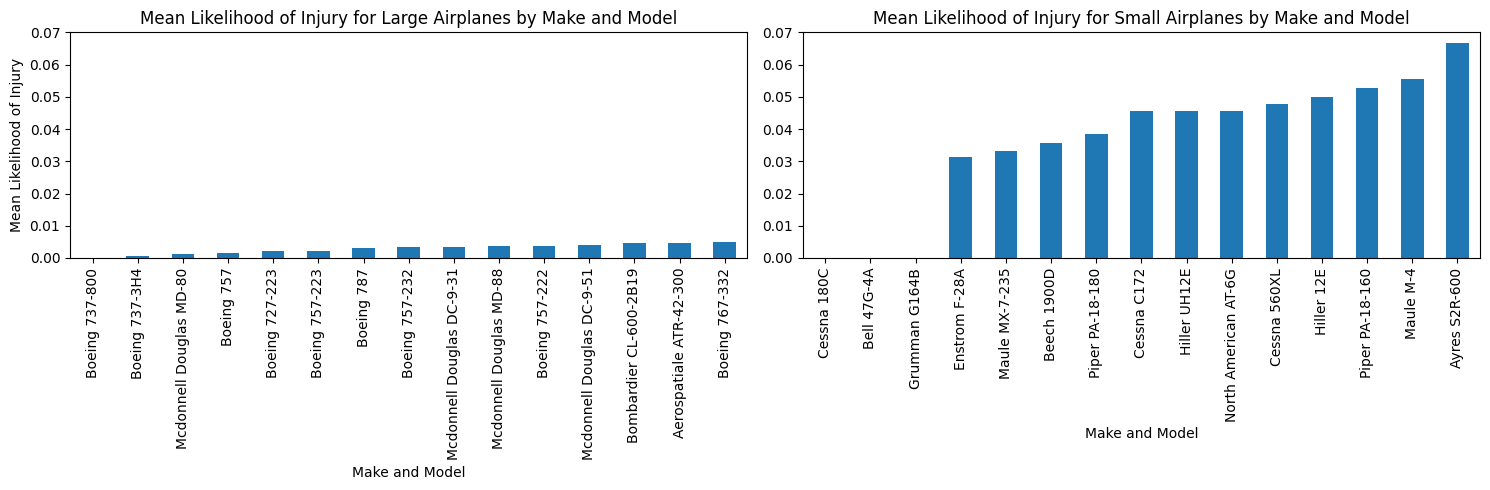

In [21]:
# Plot the two DataFrames next to each other in bar charts, matching the Y-axis scale for each
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

injury_risk_model_large_bottom15.plot.bar(
    ax = axes[0],
    x = 'Make',
    title = 'Mean Likelihood of Injury for Large Airplanes by Make and Model',
    legend = False)

injury_risk_model_small_bottom15.plot.bar(
    ax = axes[1],
    x = 'Make',
    title = 'Mean Likelihood of Injury for Small Airplanes by Make and Model',
    legend = False)

axes[0].set_xlabel('Make and Model')
axes[1].set_xlabel('Make and Model')
axes[0].set_ylabel('Mean Likelihood of Injury')
axes[0].tick_params(axis = 'x', rotation = 90)
axes[0].set_ylim(0, 0.07)
axes[1].set_ylim(0, 0.07)
plt.tight_layout()
plt.show()

**Larger planes**

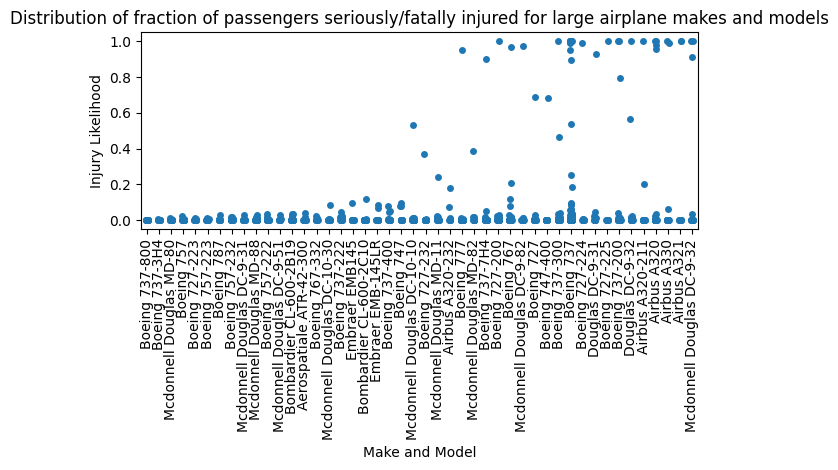

In [22]:
# Filter the data to the relevant columns, filter by Airplane.Type, group by Make and Model, and filter by the Make and Models found in the step above
injury_risk_model_large_plot = c_data_large_filtered[['Plane.Type', 'Make.and.Model', 'Injury.Likelihood']][c_data_large_filtered['Make.and.Model'].isin(make_and_model_top_categories_large)]

# Plot the strip plot
fig = sns.stripplot(
    data = injury_risk_model_large_plot,
    x = 'Make.and.Model',
    y = 'Injury.Likelihood',
    order = c_data_large_filtered[c_data_large_filtered['Plane.Type'] == 'Large'].groupby('Make.and.Model')['Injury.Likelihood'].mean().sort_values().index.tolist()
)

plt.title('Distribution of fraction of passengers seriously/fatally injured for large airplane makes and models')
plt.xticks(rotation = 90)
plt.xlabel('Make and Model')
plt.ylabel('Injury Likelihood')
plt.tight_layout()
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

['Cessna 180C', 'Bell 47G-4A', 'Grumman G164B', 'Enstrom F-28A', 'Maule MX-7-235', 'Beech 1900D', 'Piper PA-18-180', 'Cessna C172', 'Hiller UH12E', 'North American AT-6G']


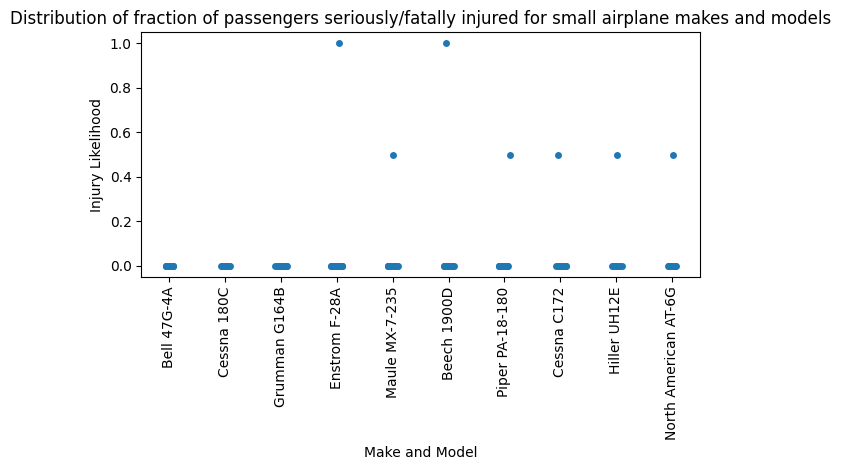

In [23]:
# Filter the data to the relevant columns, filter by Airplane.Type, group by Make and Model, and filter by the Make and Models found in the step above
injury_risk_model_small_bottom10 = c_data_small_filtered[c_data_small_filtered['Plane.Type'] == 'Small'].groupby('Make.and.Model')['Injury.Likelihood'].mean().sort_values(ascending = True).head(10).index.tolist()
print(injury_risk_model_small_bottom10)

injury_risk_model_small_plot = c_data_small_filtered[['Plane.Type', 'Make.and.Model', 'Injury.Likelihood']][c_data_small_filtered['Make.and.Model'].isin(injury_risk_model_small_bottom10)]

# Plot the strip plot
fig = sns.stripplot(
    data = injury_risk_model_small_plot,
    x = 'Make.and.Model',
    y = 'Injury.Likelihood',
    order = injury_risk_model_small_plot[injury_risk_model_small_plot['Plane.Type'] == 'Small'].groupby('Make.and.Model')['Injury.Likelihood'].mean().sort_values().index.tolist()
)

plt.title('Distribution of fraction of passengers seriously/fatally injured for small airplane makes and models')
plt.xticks(rotation = 90)
plt.xlabel('Make and Model')
plt.ylabel('Injury Likelihood')
plt.tight_layout()
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

In [ ]:
# SMALLER VS LARGER AIRPLANES

'''Comparing the mean rates of injury for large makes and models vs small makes and models shows a similar trend as just comparing the makes. The large models with the lowest rates of injury range from 0% to 0.5%, while the small models with the lowest rate of injury range from 0% to 6.7%. This shows that by this metric, large planes are safer than small planes because they have a lower likelihood of fatal/serious injury.'''

# SMALL AIRPLANES

'''Of the small airplanes in this data, the Cessna 180C, Bell 47G-4A, and Grumman G164B all stand out with a 0% likelihood of injury. This is shown in the distribution chart as well, with all values at 0%. The other 7 models shown all have injury rates concentrated at 0% as well, with additional data points at 50% or 100%. The makes sense logically, since when there is an accident on a small plane, there is a small number of people available to be injured, and it is more likely than on a large plane that all or most passsengers would be injured when an accident occurs.

Based on the metric of likelihood of injury, the Cessna 180C, Bell 47G-4A, and Grumman G164B are the top recommendations for small planes.'''

# LARGE AIRPLANES

'''Of the large airplanes in this data, the Boeing 737-800, Boeing 737-3H4, Mcdonnell Douglas MD-80, and Boeing 757 all have a less than 0.2% likelihood of injury. This is shown in the distribution chart as well, with the likelihood of injury values for these models concentrated around 0%, with no outliers. The chart is sorted by ascencing mean value of likelihood of injury, so we can see that the models with the lowest likelihood of injury have data points concentrated around 0%. As we move to the right along the x-axis and to models with higher likelihoods of injury, there are more data points above 10%, indicating a less safe model.

Based on the metric of likelihood of injury, the Boeing 737-800, Boeing 737-3H4, Mcdonnell Douglas MD-80, and Boeing 757 are the top recommendations for large planes.'''

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

In [ ]:
# PHASE OF FLIGHT

# Group the data by phase of flight and aircraft destroyed, take the mean, unstack the data, and calculate the rate
phase_destruction = c_data.groupby(['Broad.phase.of.flight', 'Aircraft.Destroyed']).count().rename(columns = {'Plane.Type': 'Counts'})['Counts'].unstack()
phase_destruction['Rate'] = phase_destruction[True] / (phase_destruction[True] + phase_destruction[False])
phase_destruction.reset_index(inplace = True)

# Put the phases in order
phase_mapping = {
    'Standing': 1,
    'Taxi': 2,
    'Takeoff': 3,
    'Climb': 4,
    'Cruise': 5,
    'Maneuvering': 6,
    'Descent': 7,
    'Go-around': 8,
    'Approach': 9,
    'Landing': 10,
    'Other': 11,
    'Unknown': 12
}

phase_destruction['Order'] = phase_destruction['Broad.phase.of.flight'].map(phase_mapping)
phase_destruction = phase_destruction.sort_values('Order')

print(phase_destruction)

# Determine what percentage of values are Unknown
(c_data['Broad.phase.of.flight'] == 'Unknown').sum() / c_data['Broad.phase.of.flight'].value_counts().sum()

Aircraft.Destroyed Broad.phase.of.flight  False  True      Rate  Order
8                               Standing    678    84  0.110236      1
10                                  Taxi   1563    41  0.025561      2
9                                Takeoff   7328  2016  0.215753      3
1                                  Climb    967   613  0.387975      4
2                                 Cruise   5403  2672  0.330898      5
6                            Maneuvering   3356  2518  0.428669      6
3                                Descent   1034   426  0.291781      7
4                              Go-around    832   331  0.284609      8
0                               Approach   3500  1394  0.284839      9
5                                Landing  11832   540  0.043647     10
7                                  Other     51    18  0.260870     11
11                               Unknown  15543  2704  0.148189     12


0.2788185318745798

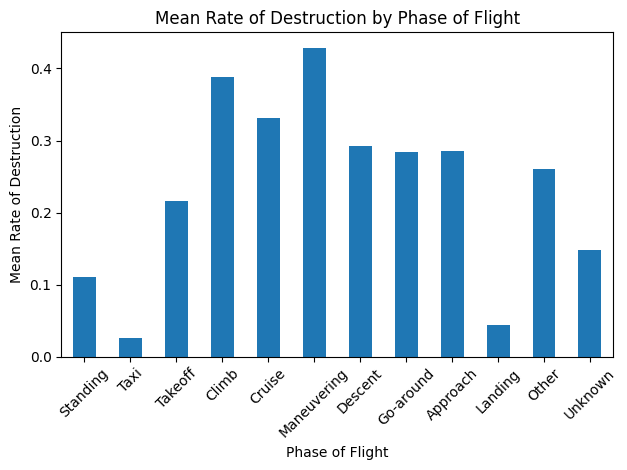

In [25]:
# Plot the data in a bar chart
phase_destruction.plot.bar(
    x = 'Broad.phase.of.flight',
    y = 'Rate',
    title = 'Mean Rate of Destruction by Phase of Flight',
    legend = False)

plt.xlabel('Phase of Flight')
plt.ylabel('Mean Rate of Destruction')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [ ]:
# Grouping the data about the rate of destruction by phase of flight shows that the three most dangerous phases are maneuvering (43%), climbing (39%), and cruising (33%). By this metric, the safest phases of flight are taxiing (3%) and landing (4%).

# It is important to note that 28% of the flights in the data set have a phase of flight of Unknown. Filling in more of these values has the potential to change these rates of destruction and could potentially impact this analysis. 

# This data could be used to inform which phases of flight pilots should receive additional training for.

In [ ]:
# PURPOSE OF FLIGHT vs PHASE OF FLIGHT

# Examine the data
c_data['Purpose.of.flight'].value_counts()

# Filter out the purposes with fewer than 100 occurances
purpose_phase_counts = c_data['Purpose.of.flight'].value_counts()
purpose_phase_categories = purpose_phase_counts[purpose_phase_counts >= 100].index.tolist()
purpose_phase = c_data[['Purpose.of.flight', 'Broad.phase.of.flight', 'Aircraft.Destroyed']][c_data['Purpose.of.flight'].isin(purpose_phase_categories)]

# Rearrange to pivot table
purpose_phase_pivot = purpose_phase.pivot_table(index = 'Purpose.of.flight', columns = 'Broad.phase.of.flight', values = 'Aircraft.Destroyed').reindex(phase_mapping, axis = 1)
purpose_phase_pivot

Broad.phase.of.flight,Standing,Taxi,Takeoff,Climb,Cruise,Maneuvering,Descent,Go-around,Approach,Landing,Other,Unknown
Purpose.of.flight,,,,,,,,,,,,
Aerial Application,0.400000,0.181818,0.177807,0.250000,0.217391,0.325513,0.200000,0.400000,0.203390,0.039648,NaN,0.126482
Aerial Observation,0.000000,0.111111,0.318182,0.545455,0.300885,0.459119,0.300000,0.000000,0.250000,0.047619,NaN,0.267857
Business,0.078947,0.061856,0.285408,0.605042,0.447619,0.447826,0.444444,0.464286,0.407895,0.047002,0.000000,0.251701
Executive/corporate,0.000000,0.055556,0.414634,0.588235,0.441860,0.428571,0.300000,0.857143,0.482759,0.046875,NaN,0.225000
Ferry,0.142857,0.083333,0.284314,0.368421,0.358852,0.350000,0.263158,0.000000,0.229167,0.145833,NaN,0.272727
Flight Test,NaN,0.000000,0.307692,0.000000,0.125000,0.400000,1.000000,0.000000,0.181818,0.000000,NaN,0.108434
Instructional,0.180556,0.021505,0.134631,0.254386,0.212435,0.356209,0.145038,0.136213,0.242424,0.031553,0.250000,0.063860
Other Work Use,0.142857,0.083333,0.241071,0.478261,0.315789,0.289116,0.266667,0.000000,0.176471,0.000000,0.444444,0.174825
Personal,0.106628,0.022697,0.231549,0.446490,0.344572,0.534851,0.324423,0.310393,0.275184,0.046733,0.242424,0.132997


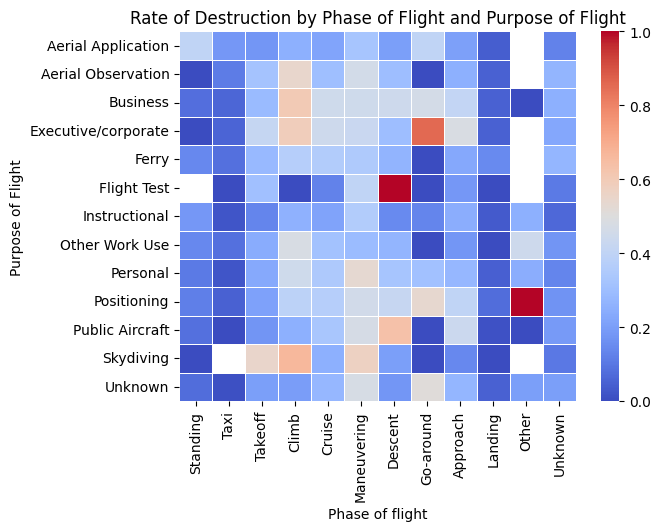

In [27]:
# Plot the data as a heatmap
ax = sns.heatmap(
    purpose_phase_pivot,
    linewidth = .5,
    cmap = 'coolwarm')

ax.set(
    xlabel = 'Phase of flight',
    ylabel = 'Purpose of Flight',
    title = 'Rate of Destruction by Phase of Flight and Purpose of Flight'
)

plt.show()

In [ ]:
# The heatmap clearly shows the phases of flight and purposes of flight that have the highest rates of destruction. The Descent of a Flight Test and Other of Positioning stand out with a 100% rate of destruction. Go-around for Executive/corporate, Climb of Skydiving, and Descent of Public Aircraft all have a rate of destruction above 60%, showing that these phases for these types of flights are more dangerous than usual.

# Similar to the above analysis, filling in the categorization for the Unknown phases of flight, and even the Other phases of flight if possible, could potentially impact this analysis by filling in additional data.

# This data could be used to inform which phases of flight pilots who fly for specific purposes should receive additional training for, rather than the aggregated data above. For example, a pilot who mostly focuses on Execute/Corporate flights should receive additional training in Climbing and Go-Arounds, in order to further reduce the likelihood of a crash.